In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

[[0 0 0 7 0 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 8 0 0 0]
 [7 0 8 0 1 2 1]
 [0 0 0 1 0 2 0]
 [0 9 0 2 2 0 0]
 [0 0 0 1 0 0 0]]


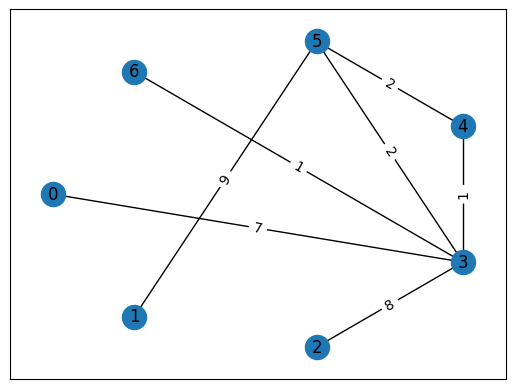

In [119]:
adj_mat = np.round(scipy.stats.bernoulli.rvs(0.2, size=[7,7])).astype(int)
adj_mat = adj_mat - np.diag(np.diag(adj_mat))
adj_mat[adj_mat != 0] = np.random.randint(1, 10, size=np.count_nonzero(adj_mat!=0))

adj_mat = adj_mat + adj_mat.T

G = nx.Graph(adj_mat)
print(adj_mat)

# G = nx.path_graph(20)

pos = nx.shell_layout(G, scale=3)
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
plt.show()

[(0, 4, {'weight': 8}), (1, 4, {'weight': 4}), (1, 5, {'weight': 8}), (2, 4, {'weight': 6}), (2, 8, {'weight': 8}), (3, 5, {'weight': 8}), (3, 8, {'weight': 4}), (5, 6, {'weight': 5}), (5, 7, {'weight': 5}), (5, 9, {'weight': 8}), (6, 8, {'weight': 9}), (7, 9, {'weight': 3}), (8, 9, {'weight': 6})]
[(0, 4), (1, 4), (1, 5), (2, 4), (2, 8), (3, 5), (3, 8), (5, 6), (5, 7), (5, 9), (6, 8), (7, 9), (8, 9)]


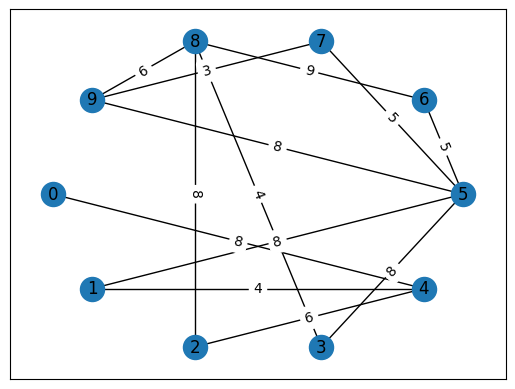

In [200]:
s = 10

G = nx.gnp_random_graph(s, 0.3)
for (u,v,w) in G.edges(data=True):
    w['weight'] = np.random.randint(1,10)

print(nx.to_edgelist(G))
print(G.edges())

plot_graph(G)

In [279]:
def create_tsp_graph(size, p):
    g = nx.gnp_random_graph(size, p)
    for (u,v,w) in g.edges(data=True):
        w['weight'] = np.random.uniform(0,50)
    return g

def plot_graph(G):
    pos = nx.shell_layout(G, scale=3)
    nx.draw_networkx(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
    plt.show()

def tsp_to_file(filename, g):
    with open(filename, "w") as f:
        f.write("Edge1,Edge2,Weight\n")
        for u, v, w in g.edges(data=True):
            f.write(f"{u},{v},{w['weight']}\n")

In [280]:
for i in range(1, 11):
    for j in [20, 50, 75, 100]:
        tsp_to_file(f"r{j}_{i:02d}.csv", create_tsp_graph(j, 0.3))